In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Prepare the data
X_linear = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_linear = df['Outcome']

# Fit the linear regression model
model_linear = LinearRegression()
model_linear.fit(X_linear, y_linear)

# Print the coefficients
print('Linear Regression Coefficients:')
for feature, coef in zip(X_linear.columns, model_linear.coef_):
    print(f'{feature}: {coef}')

# Make predictions
predictions_linear = model_linear.predict(X_linear)


Linear Regression Coefficients:
Glucose: 0.0059325046803608995
BloodPressure: -0.0022788371254208947
SkinThickness: 0.00016697889986792483
Insulin: -0.00020961695141379316
BMI: 0.013310837289280059
DiabetesPedigreeFunction: 0.1376781570786882
Age: 0.005800684345071755


In [13]:
# Prepare the data
X_logistic = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_logistic = df['Outcome']

# Fit the logistic regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_logistic, y_logistic)

# Print the coefficients
print('Logistic Regression Coefficients:')
for feature, coef in zip(X_logistic.columns, model_logistic.coef_[0]):
    print(f'{feature}: {coef}')

# Make predictions
predictions_logistic = model_logistic.predict(X_logistic)

Logistic Regression Coefficients:
Glucose: 0.034545336209805995
BloodPressure: -0.012210406827877348
SkinThickness: 0.0010018672282552361
Insulin: -0.0013498565827439583
BMI: 0.08781245206910507
DiabetesPedigreeFunction: 0.8191266417845497
Age: 0.03269638064724314


C:\Users\amrut\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
import statsmodels.api as sm

# Split the dataset into the independent variables (X) and the dependent variable (y)
X = df.drop('Outcome', axis=1)  # Independent variables
y = df['Outcome']  # Dependent variable

# Add a constant column to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           7.36e-55
Time:                        19:11:44   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

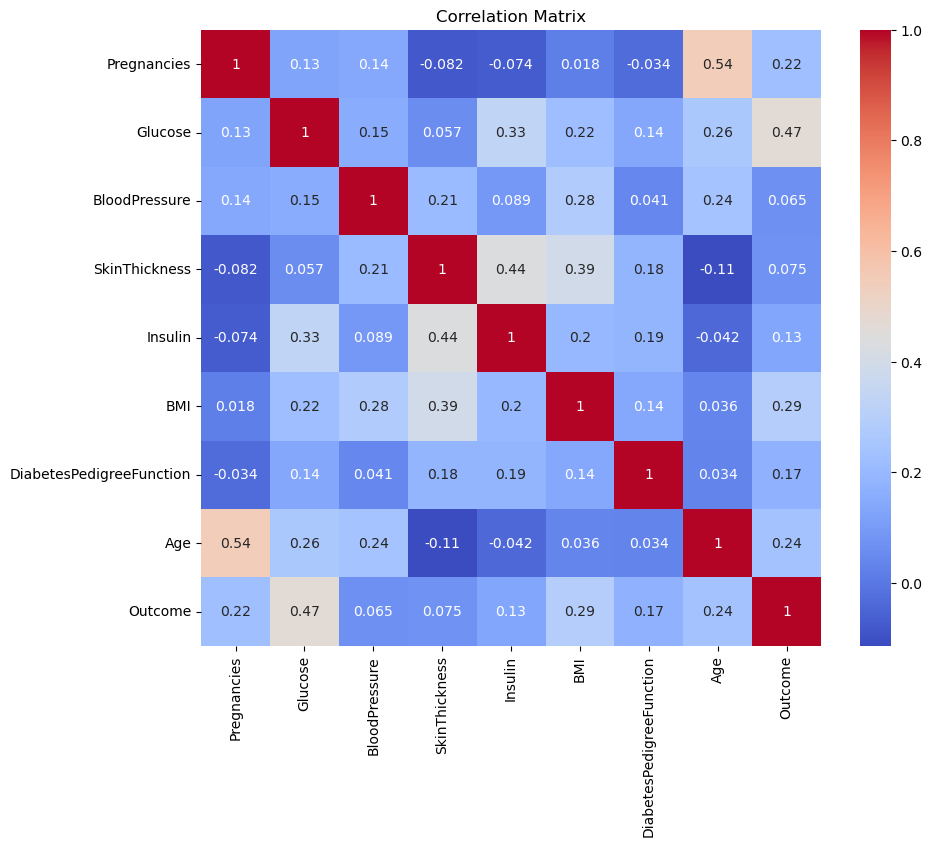

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


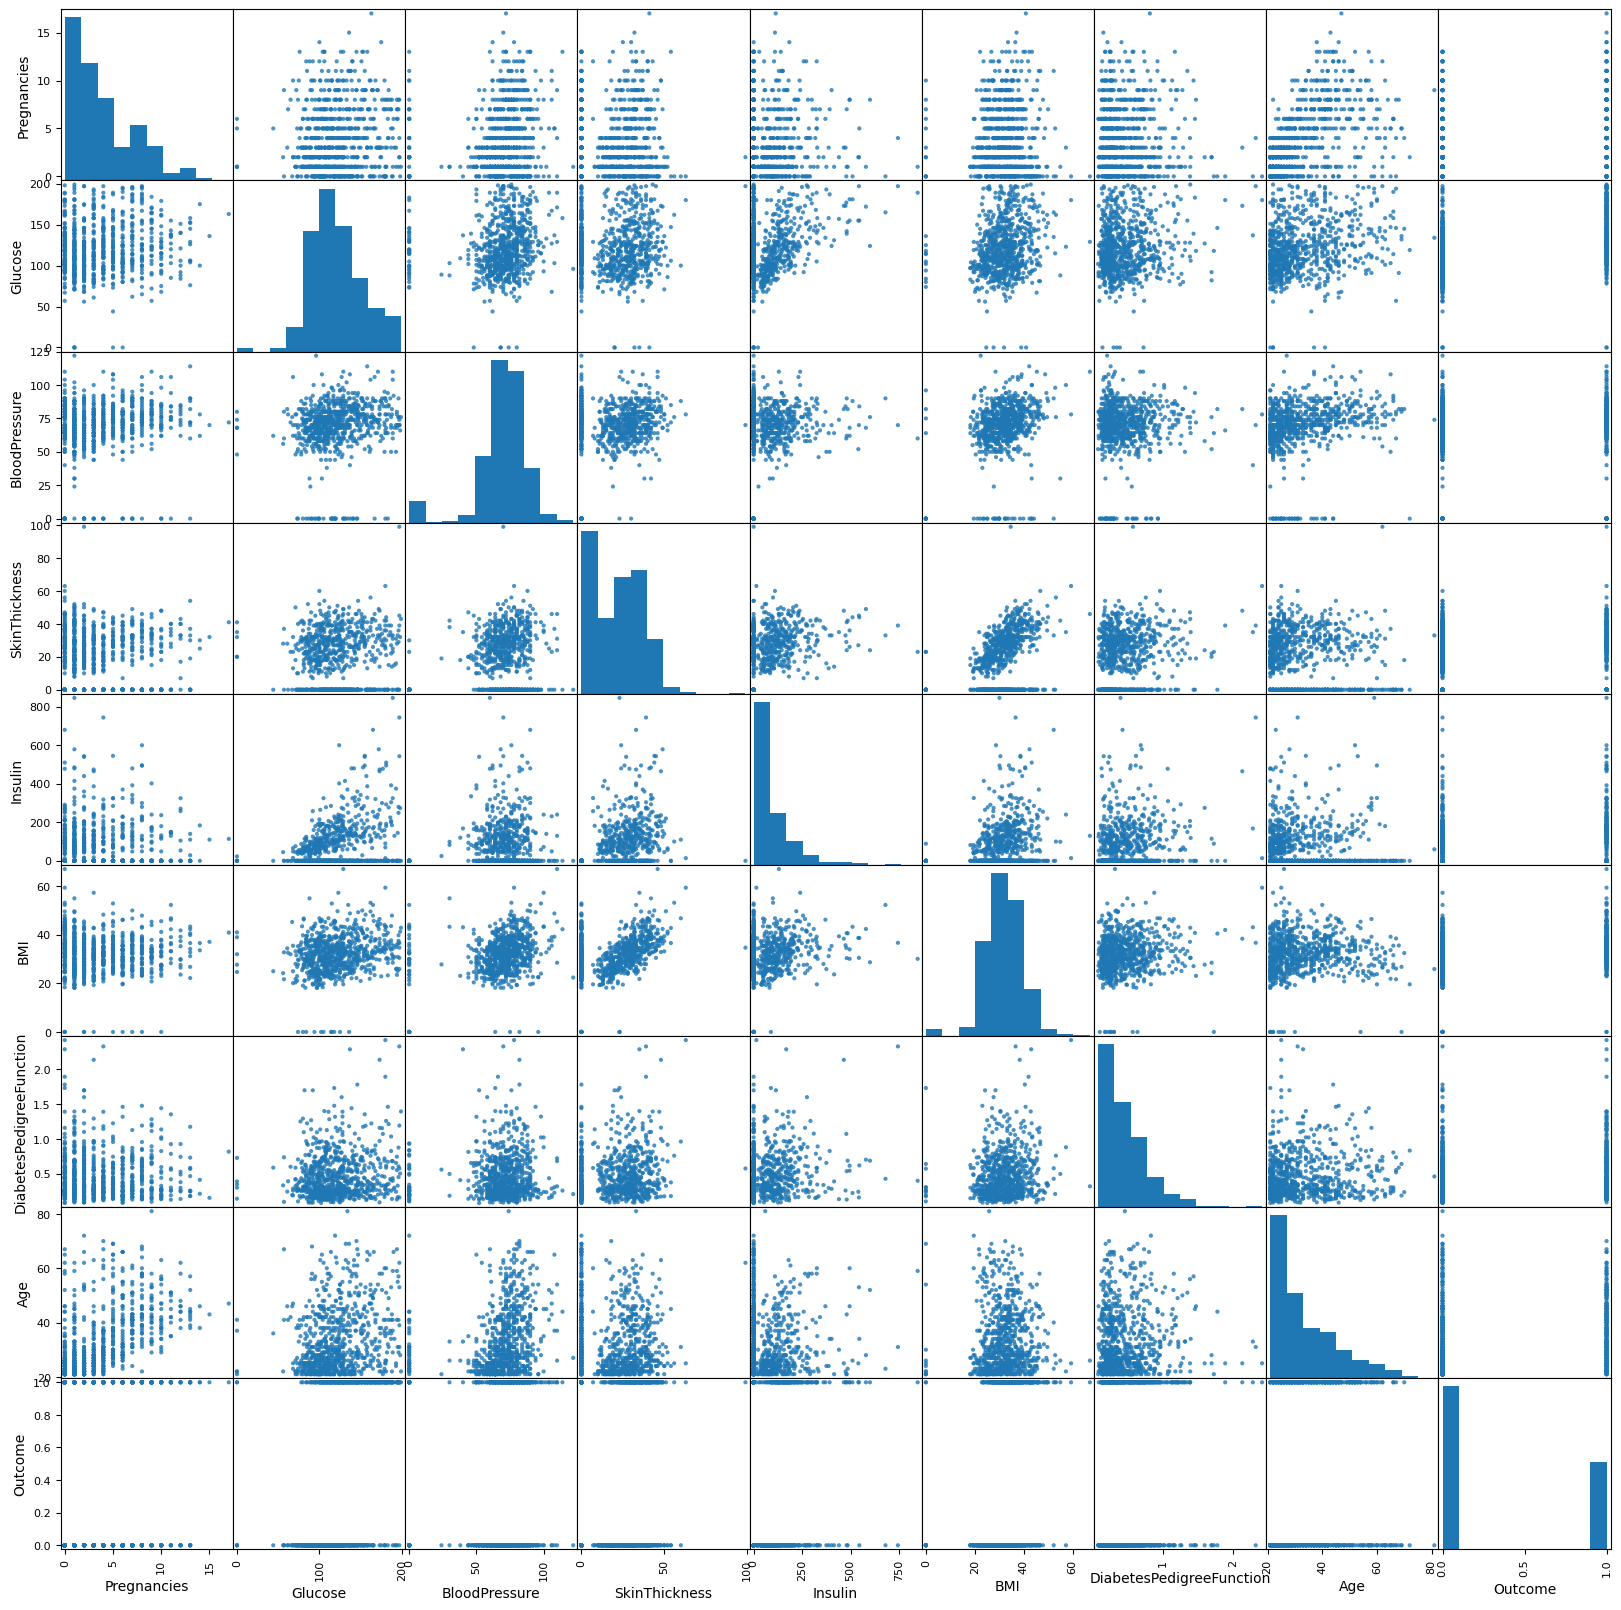

In [25]:
# Import required packages
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Set figure size
plt.rcParams['figure.figsize'] = [20, 20]

# Plot Scatterplot Matrix
scatter_matrix(df, alpha=0.8, diagonal='hist', figsize=(20, 20))

# Show plot
plt.show()
